In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")
# pandas options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("float_format", "{:.3f}".format)

%matplotlib inline
plt.style.use("seaborn-whitegrid")



## Get and Download the data 

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Read and Quick look at the data

In [5]:
df = load_housing_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000,NEAR BAY
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000,NEAR BAY
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000,NEAR BAY
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000,NEAR BAY
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.000,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.540,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.330,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.000,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.000,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.000,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.000,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.000,15.000,500001.000


In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

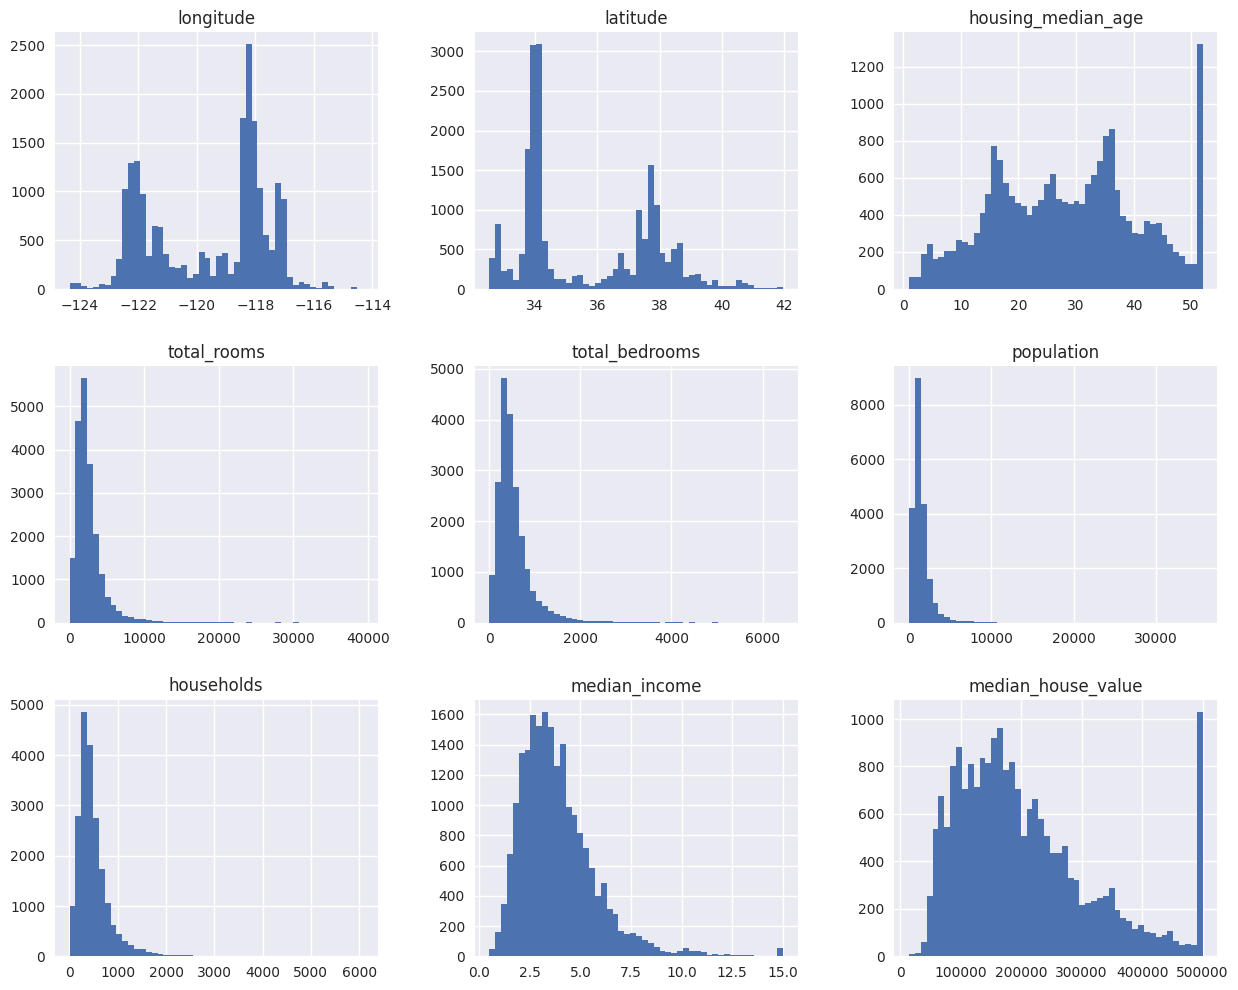

In [9]:
plt.style.use("seaborn")
df.hist(figsize=(15, 12), bins=50)

In [10]:
print(df["housing_median_age"].max())
np.sum(df["housing_median_age"] == df["housing_median_age"].max())

52.0


1273

## Split the dataset

In [11]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train, test = split_train_test(df, 0.2)
len(train), len(test)

(16512, 4128)

## EDA

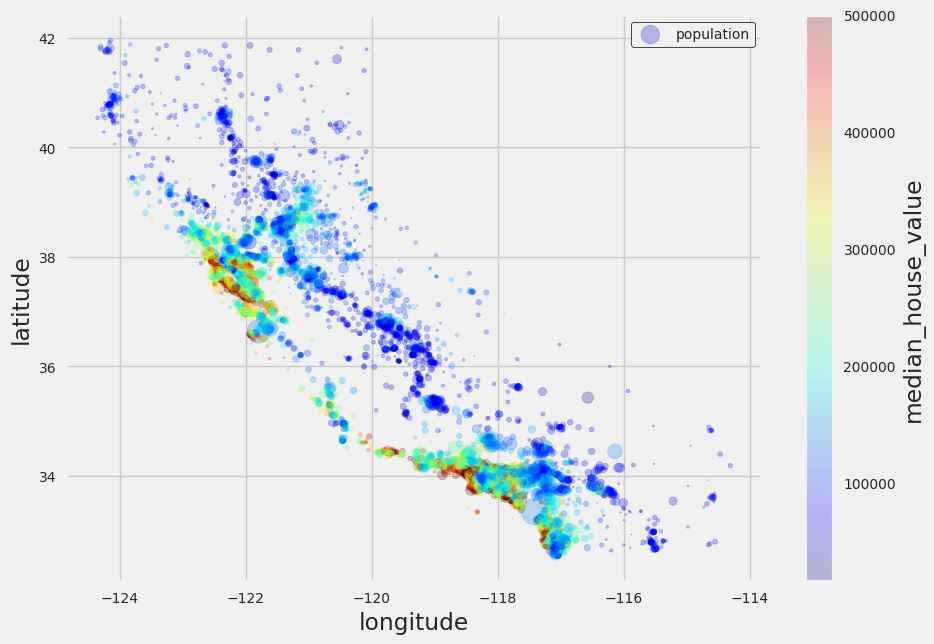

In [13]:
plt.style.use("fivethirtyeight")
train.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    s=train["population"] / 100,
    c="median_house_value",
    label="population",
    alpha=0.25,
    colorbar=True,
    figsize=(10, 7),
    cmap=plt.get_cmap("jet"),
)
plt.legend(frameon=True, fancybox=True, framealpha=1, edgecolor="black")

Clearly the prices are higher neary the ocean so **ocean_proximity** is a good feature to use.

<Axes: xlabel='longitude', ylabel='latitude'>

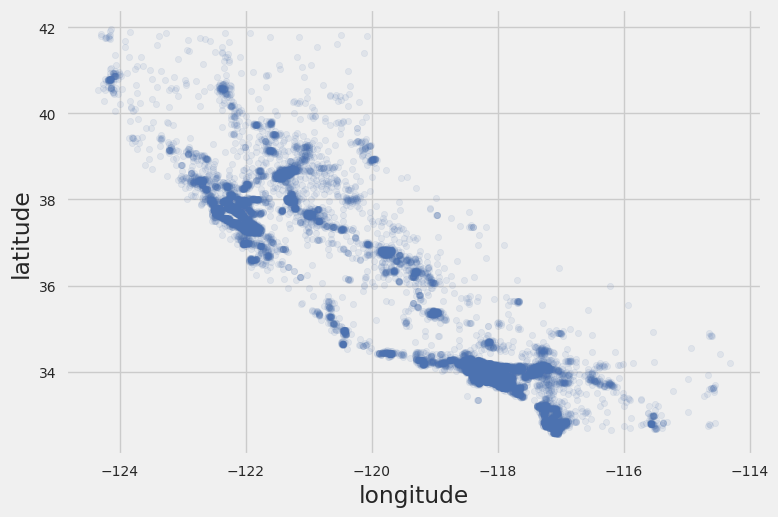

In [14]:
train.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.1,
)


<Axes: >

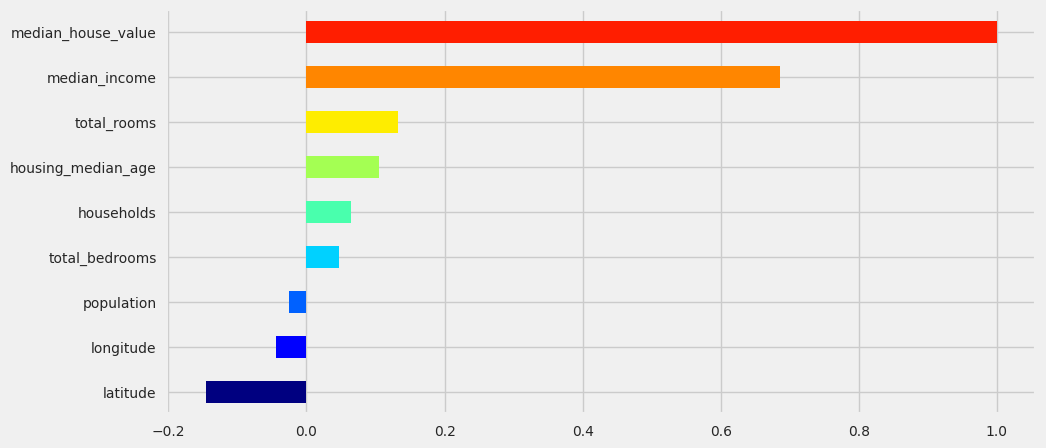

In [15]:
cmap = plt.cm.jet
colors = [cmap(i) for i in range(cmap.N)]
colors = colors[::28]
corr = train.corr()
corr["median_house_value"].sort_values().plot(
    kind="barh", color=colors, figsize=(10, 5)
)

Prices have a slight tendency to go down when you go north, as there is a slight negative correlation with latitude

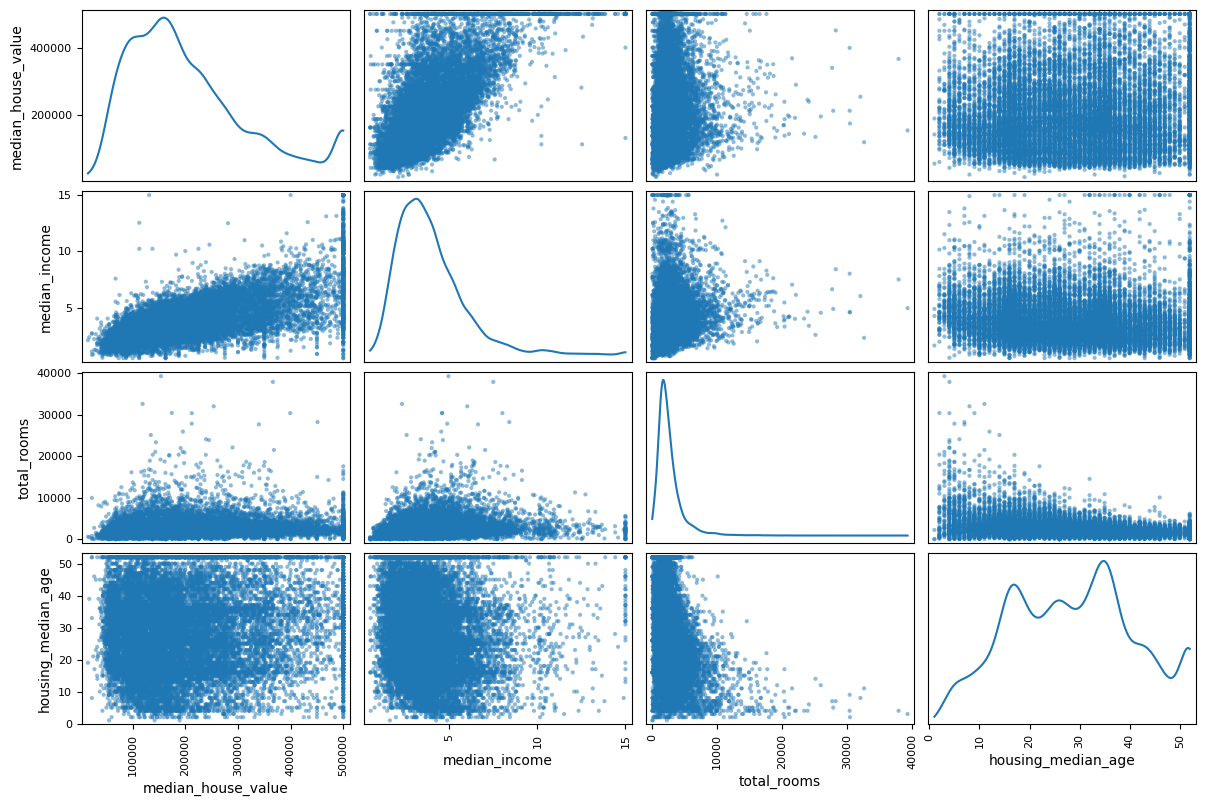

In [16]:
from pandas.plotting import scatter_matrix

plt.style.use("default")
attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age",
]
scatter_matrix(train[attributes], figsize=(12, 8), diagonal="kde")
plt.tight_layout(pad=0.5)

<Axes: xlabel='median_income', ylabel='median_house_value'>

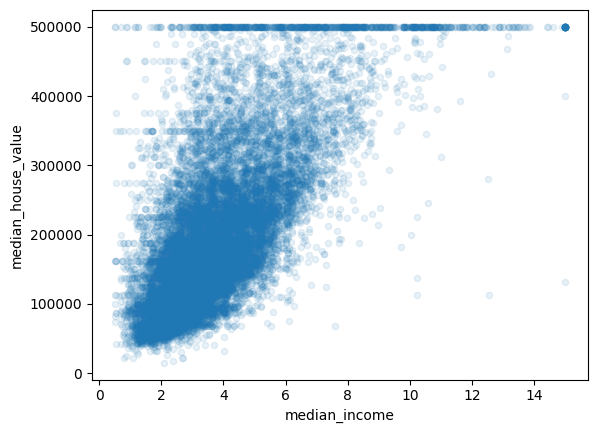

In [17]:
train.plot(
    kind="scatter", x="median_income", y="median_house_value", alpha=0.1
)

## Prepare data for ML

In [18]:
X = train.drop(["median_house_value"], axis=1)
X_test = test.drop(["median_house_value"], axis=1)
y = train["median_house_value"]
y_test = test["median_house_value"]

## Data Preprocessing

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

total_rooms, total_bedroom, population, households = tuple(range(3, 7))


class CombineAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, room_features=True) -> None:
        super().__init__()
        self.room_features = room_features
        self.feats_in = X.select_dtypes(exclude="object").columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        population_per_household = X[:, population] / X[:, households]
        bedrooms_per_household = X[:, total_bedroom] / X[:, households]
        bedrooms_per_person = X[:, total_bedroom] / X[:, population]

        if self.room_features:
            rooms_per_person = X[:, total_rooms] / X[:, population]
            rooms_per_household = X[:, total_rooms] / X[:, households]
            bedrooms_per_room = X[:, total_bedroom] / X[:, total_rooms]
            return np.c_[
                X,
                population_per_household,
                bedrooms_per_household,
                bedrooms_per_person,
                rooms_per_person,
                rooms_per_household,
                bedrooms_per_room,
            ]
        else:
            np.c_[
                X,
                population_per_household,
                bedrooms_per_household,
                bedrooms_per_person,
            ]

        return X

    def get_feature_names_out(self, names):

        names = list(names)
        if self.room_features:
            return names + [
                "population_per_household",
                "bedrooms_per_household",
                "bedrooms_per_person",
                "rooms_per_person",
                "rooms_per_household",
                "bedrooms_per_room",
            ]
        else:
            return names + [
                "population_per_household",
                "bedrooms_per_household",
                "bedrooms_per_person",
            ]

## Full Pipeline

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipelien = Pipeline(
    [
        ("impute", SimpleImputer(strategy="median")),
        ("new_attr", CombineAttributes()),
        ("scaler", StandardScaler()),
    ]
)

num_cols = X.select_dtypes(exclude="object").columns
cat_cols = ["ocean_proximity"]


preprocessing = ColumnTransformer(
    [
        ("num_pipeline", num_pipelien, num_cols),
        ("oh_encoder", OneHotEncoder(sparse=False), cat_cols),
    ],
    remainder="passthrough",
)

## Training ML Models

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


def score_model(model, X, y, X_test=X_test, y_test=y_test):
    """Score a model using 5-Fold cross-validation

    Args:
        model : sklearn estimator
        X (pd.DataFrame): Features
        y (pd.Series): Target
        X_test (optional): Defaults to X_test.
        y_test (optional): Defaults to y_test.

    Returns:
        val_rmse, val_std, train_rmse, test_rmse
    """
    scores = -cross_val_score(
        model, X, y, scoring="neg_mean_squared_error", cv=5
    )
    scores = np.sqrt(scores)
    print(f"Validation Mean RMSE: {scores.mean():.3f} +/- {scores.std():.3f}")

    model.fit(X, y)
    y_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Test RMSE: {test_rmse}")
    y_pred = model.predict(X)
    train_rmse = np.sqrt(mean_squared_error(y, y_pred))
    print(f"Train RMSE: {train_rmse}")
    return scores.mean(), scores.std(), train_rmse, test_rmse

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessing, LinearRegression())
val_rmse, val_std, train_rmse, test_rmse = score_model(model, X, y)

Validation Mean RMSE: 66152.520 +/- 1269.963
Test RMSE: 69435.88137684973
Train RMSE: 65850.71313528746


## Decision Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor

model = make_pipeline(preprocessing, DecisionTreeRegressor())
val_rmse, val_std, train_rmse, test_rmse = score_model(model, X, y)

Validation Mean RMSE: 71224.256 +/- 2137.087
Test RMSE: 69784.69133075415
Train RMSE: 0.0


## Random Forest Regression

In [24]:
from sklearn.ensemble import RandomForestRegressor

model = make_pipeline(preprocessing, RandomForestRegressor())
val_rmse, val_std, train_rmse, test_rmse = score_model(model, X, y)

Validation Mean RMSE: 50038.829 +/- 796.816
Test RMSE: 49398.92165999728
Train RMSE: 18506.102221904493


## Hyper Parameter Tuning

### GridSearch CV

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "rf__n_estimators": [60, 70, 80, 90, 100, 110, 120, 130, 140],
        "rf__max_features": [4, 6, 8, 10, 12, 14, 16],
    },
]

model = Pipeline(
    [("preprocessing", preprocessing), ("rf", RandomForestRegressor())]
)
grid_search = GridSearchCV(
    model,
    param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)
grid_search = grid_search.fit(X, y)
val_rmse, val_std, train_rmse, test_rmse = score_model(
    grid_search.best_estimator_, X, y
)

Validation Mean RMSE: 49522.599 +/- 848.637
Test RMSE: 49137.85709011383
Train RMSE: 18283.108831014906


Print out the best parameters and the best score

In [30]:
res = pd.DataFrame(grid_search.cv_results_).iloc[:, 4:]
res.sort_values(by='rank_test_score', inplace=True)
res = res[['rank_test_score', 'mean_test_score', 'param_rf__n_estimators', 'param_rf__max_features']].reset_index(drop=True)
res['mean_test_score'] = np.sqrt(-res['mean_test_score'])
res.head()

,rank_test_score,mean_test_score,param_rf__n_estimators,param_rf__max_features
0,1,49316.706,110,12
1,2,49457.402,130,10
2,3,49467.811,110,10
3,4,49482.200,120,14
4,5,49512.617,120,8


### Feature Importances based on Random Forest Regression

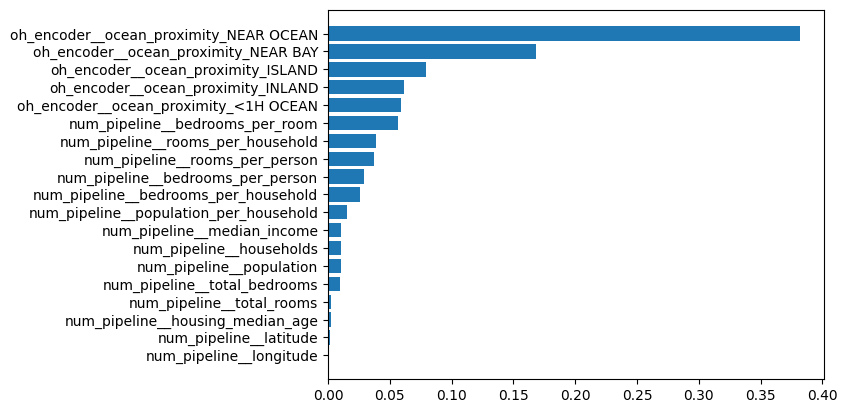

In [31]:
x_imp = grid_search.best_estimator_.named_steps['rf'].feature_importances_
x_imp = np.sort(x_imp)
y_imp = preprocessing.fit(X).get_feature_names_out()
# fig, ax = plt.subplots(figsize=(12, 8))
plt.barh(y_imp, x_imp);

## Feature Selection - Backward Elimination

In [32]:
from sklearn.feature_selection import SequentialFeatureSelector

params = grid_search.best_params_
model = Pipeline(
    [
        (
            "rf",
            RandomForestRegressor(
                n_estimators=params["rf__n_estimators"],
                max_features=params["rf__max_features"],
            ),
        )
    ],
    memory="temp",
)

feat_select = SequentialFeatureSelector(
    model,
    direction="backward",
    scoring="neg_mean_squared_error",
    cv=5,
    n_features_to_select=16,
    n_jobs=-1,
)

In [33]:
feat_select.fit(preprocessing.fit_transform(X), y)

SequentialFeatureSelector(direction='backward',
                          estimator=Pipeline(memory='temp',
                                             steps=[('rf',
                                                     RandomForestRegressor(max_features=12,
                                                                           n_estimators=110))]),
                          n_features_to_select=16, n_jobs=-1,
                          scoring='neg_mean_squared_error')

In [34]:
X_select = preprocessing.fit_transform(X)
X_select = feat_select.transform(X_select)
X_test_select = preprocessing.transform(X_test)
X_test_select = feat_select.transform(X_test_select)

In [35]:
model = Pipeline(
    [
        (
            "rf",
            RandomForestRegressor(
                n_estimators=130,
                max_features=8,
            ),
        ),
    ],
)
score_model(model, X_select, y, X_test_select, y_test)

Validation Mean RMSE: 48158.843 +/- 872.121
Test RMSE: 47448.35465180862
Train RMSE: 17613.672021011786


(48158.843051317104, 872.1208689312166, 17613.672021011786, 47448.35465180862)

## Exercise - 1
Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyper
parameters such as kernel="linear" (with various values for the C hyperpara
meter) or kernel="rbf" (with various values for the C and gamma
hyperparameters). Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?

In [36]:
from sklearn.svm import SVR

param_grid = [
    {
        "svr__kernel": ["linear"],
        "svr__C": np.linspace(100, 50000, 2),
    },
    {
        "svr__kernel": ["rbf"],
        "svr__C": np.linspace(100, 5000, 10),
        "svr__gamma": np.linspace(0.0001, 0.01, 10),
    },
]

model = Pipeline(
    [("preprocessing", preprocessing), ("svr", SVR())],
)
grid_search = GridSearchCV(
    model,
    param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    refit=False,
    return_train_score=False,
)

grid_search.fit(X, y)
model = model.set_params(**grid_search.best_params_)
score_model(model, X, y)

Validation Mean RMSE: 66491.674 +/- 1264.425
Test RMSE: 65740.47679948898
Train RMSE: 65804.43187177234


(66491.67434610825, 1264.4251190027665, 65804.43187177234, 65740.47679948898)

## Exercise - 2
Replace GridSearchCV with RandomizedSearchCV to find the best hyperparameters

In [37]:
from scipy.stats import expon, reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {"svr__kernel": ["linear"], "svr__C": reciprocal(10, 200000)},
    {
        "svr__kernel": ["rbf"],
        "svr__C": reciprocal(10, 200000),
        "svr__gamma": expon(scale=1),
    },
]

model = Pipeline(
    [("preprocessing", preprocessing), ("svr", SVR())],
)
grid_search = RandomizedSearchCV(
    model,
    param_grid,
    n_iter=100,
    scoring="neg_mean_squared_error",
    cv=3,
    n_jobs=-1,
    refit=False,
    return_train_score=False,
)
grid_search = grid_search.fit(X, y)
model = model.set_params(**grid_search.best_params_)
val_rmse, val_std, train_rmse, test_rmse = score_model(model, X, y)


Validation Mean RMSE: 54052.368 +/- 1573.479
Test RMSE: 53998.353082769834
Train RMSE: 47747.68725517323


## Exercise - 3
Try adding a transformer in the preparation pipeline to select only the most
important attributes

In [38]:
# Feature Selcetion based on the support for Backward Elimination
class TopKFeatures(BaseEstimator, TransformerMixin):
    def __init__(
        self,
    ):
        self.support_ = feat_select.support_

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, self.support_]


In [42]:
model = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("topk", TopKFeatures()),
        (
            "svr",
            SVR(
                kernel=["rbf"],
                C=np.linspace(100, 5000, 10),
                gamma=np.linspace(0.0001, 0.01, 10),
            ),
        ),
    ]
)
grid_search = RandomizedSearchCV(
    model,
    param_grid,
    n_iter=200,
    scoring="neg_mean_squared_error",
    cv=4,
    n_jobs=-1,
    refit=False,
    return_train_score=False,
)
grid_search = grid_search.fit(X, y)
model = model.set_params(**grid_search.best_params_)
val_rmse, val_std, train_rmse, test_rmse = score_model(model, X, y)

Validation Mean RMSE: 54110.782 +/- 1463.738
Test RMSE: 53943.850287964815
Train RMSE: 50355.16566305344


## Exercise - 4
Create a single pipeline that does the full data preprocessing, modelling and prediction

In [43]:
model = make_pipeline(preprocessing, DecisionTreeRegressor())
val_rmse, val_std, train_rmse, test_rmse = score_model(model, X, y)
model.fit(X, y)
y_pred = model.predict(X_test)
residuals = y_test - y_pred
pred_df = pd.DataFrame(
    {"Predicted": y_pred, "Actual": y_test, "Residual": residuals}
).reset_index(drop=True)
pred_df.head()

Validation Mean RMSE: 70905.355 +/- 1498.890
Test RMSE: 70861.75627834797
Train RMSE: 0.0


,Predicted,Actual,Residual
0,422400.000,433300.000,10900.000
1,231900.000,219500.000,-12400.000
2,152600.000,108300.000,-44300.000
3,60000.000,57400.000,-2600.000
4,125400.000,135300.000,9900.000


## Exercise - 5
Automatically explore some data preprocessing steps using GridSearchCV

In [44]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

param_grid = [{
    "pre__num_pipeline__impute__add_indicator": [True, False],
    "pre__num_pipeline__impute__strategy": ['mean', 'median', 'most_frequent', 'constant'],
    "pre__num_pipeline__impute__fill_value": [-99999, 99999],
    "pre__num_pipeline__scaler": [MinMaxScaler(), RobustScaler()],
    "pre__num_pipeline__new_attr__room_features": [True, False],
}]

model = Pipeline([
    ("pre", preprocessing),
    ("model", DecisionTreeRegressor())
])

grid_search = GridSearchCV(
    model,
    param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=True,
    refit=False,
    return_train_score=False,
)
grid_search.fit(X, y)
model.set_params(**grid_search.best_params_)
val_rmse, val_std, train_rmse, test_rmse = score_model(model, X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Validation Mean RMSE: 68580.165 +/- 984.202
Test RMSE: 68684.61595503747
Train RMSE: 0.0
